# Week 1: Advanced visualization and plotting

Welcome to the first Data Science and Machine Learning module of this course!

This week, we will learn some new plotting skills using the `Matplotlib` library and perform hierarchical clustering on different datasets. You should be familiar with the Python programming language and using Jupyter Notebooks at this point, but as this is the first module of this course, you may find that you need a refresher on some material. You are encouraged to review material from your previous coursework within this week before the semester picks up!

In order to access past biotechnology modules provided in HMB201, please refer to the following GitHub repositories:
https://github.com/orgs/CS-Biotech/repositories

## Learning Objectives
By the end of this week, you will have proficiency in the following areas:
1. Basic features of the `Matplotlib` library for customizing plots
      * Create and organize plots, subplots
      * Add title, labels, and legend for plots
      * Resize plots
2. Use `scatterplots` to visualize the relationship between two features (variables) of a dataset
3. The concept of hierarchical clustering
4. Use the `scipy` library to perform hierarchical clustering
5. Use dendrograms to visualize hierarchical clustering results
      * Identify similarities between species close together on the dendrogram in an evolutionary context
      * Apply various thresholds/"slices" to cluster distance

#### **Setup**

Similar to the setup we performed in previous coursework, we first need to import various libraries as a basis to run the rest of the code in this file. `numpy` and `pandas` were introduced in previous coursework, please refer to those modules for further information.

Run the cell below for setup.

In [1]:
import numpy as np
import pandas as pd

### Part 1: Iris dataset

The Iris dataset is a classic dataset in data science. It contains petal and sepal information on 3 species of iris flowers: Setosa, Versicolour, and Virginica.

<!-- Method to Insert Image through Google Drive, which does not work on uoft jupyterHub -->
<!-- ![](https://drive.google.com/uc?export=view&id=1-kQHSJ3-527jWK8UwDXiQbacqpV274W1) -->

![iris.png](iris.png)


Our goal is to differentiate between the 3 species using their petal and sepal information. This is a classification problem with 3 possible classes.

Run the cell below to load the dataset into a pandas DataFrame ```df```.

In [2]:
from sklearn import datasets

# Load the Iris dataset and create a pandas dataframe
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data,
                  columns=iris.feature_names)

# Append the target column
df['species'] = pd.Series(iris.target)    # This creates a new column named "species" and assigns the data stored in "iris.target" to it
df.head()                                 # This shows the top rows of the dataframe, 5 rows by default

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Note that the species are coded as follows:
* 0: setosa
* 1: versicolor
* 2: virginica

To get started, let's print some basic information about the dataset. Print the following lines:
1. Number of samples
2. Target classes
3. Feature names (columns)
4. Number of setosa samples
5. Number of versicolor samples
6. Number of virginica samples

<span style="background-color: #FFD700">**Complete the code cell below**</span>

In [5]:
print(f"Number of samples: {len(df)}")

# TODO: write the five print statements below
print(f"Target classes: {iris.target_names}")
print(f"Features: {iris.feature_names}")
print(f"Number of {iris.target_names[0]}: {len(df[df['species']==0])}")
print(f"Number of {iris.target_names[1]}: {len(df[df['species']==1])}")
print(f"Number of {iris.target_names[2]}: {len(df[df['species']==2])}")

Number of samples: 150
Target classes: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Number of setosa: 50
Number of versicolor: 50
Number of virginica: 50


Before we apply algorithms to classify the iris species, we would like to visualize the dataset to gain some initial observations about the dataset. You may be familiar with using the `pandas` library to generate various plots from DataFrames. While the `pandas` library is sufficient for some basic plots, in this course we will need a more general plotting library with greater functionality, which can still work with pandas DataFrames.

#### **Matplotlib: A Python visualization library**

`Matplotlib` is a visualization library widely used by data scientists and programmers. It is highly comprehensive and
allows us to create customizable figures from our data, making it a powerful tool worth learning.

To use the `matplotlib` library for plotting, we import ```matplotlib.pyplot```. Remember that we can create an **alias** to refer to this library as a shorthand. The common alias for this library, used in the data science community, is ```plt```. Throughout our modules, we will always use ```plt``` as the alias for Matplotlib.

Run the code cell below.

In [6]:
import matplotlib.pyplot as plt

What kinds of functions are available to us from the library? These are some examples (not an exhaustive list):
* line plot: `plt.plot()`
* scatter plot: `plt.scatter()`
* bar plot: `plt.bar()`
* histogram: `plt.hist()`
* boxplot: `plt.boxplot()`

...and more. If you are interested, you can see more plotting functions available on the matplotlib documentation: https://matplotlib.org/stable/plot_types/index.html. There are a lot!

In general, when calling each of these plotting functions, we need to provide some **arguments** to the function to tell it exactly what to plot and how. Each function will require different arguments and have different customization settings available, which are described in their documentation.

#### **Scatterplots**

To start with, let's create a scatter plot. Scatter plots are great for visualizing the relationship between two variables (i.e., a **pairplot**).

Say that we want to plot the petal length (y-axis) against the sepal length (x-axis), we can call the convenient **plt.scatter()** function.

| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| `plt.scatter()` | `x`, `y`, `c` | a Matplotlib PathCollection object that plots y against x | `plt.scatter(x, y, c=*color*)` |

* `x` (required): The data to assign to the x-axis.
* `y` (required): The data to assign to the y-axis.
* `c` (optional): The marker color. Possible options include a single color, a list of colors, or list-like data that will be mapped to colors.
* ...and other optional input parameters, which you can read about in the `matplotlib` documentation.

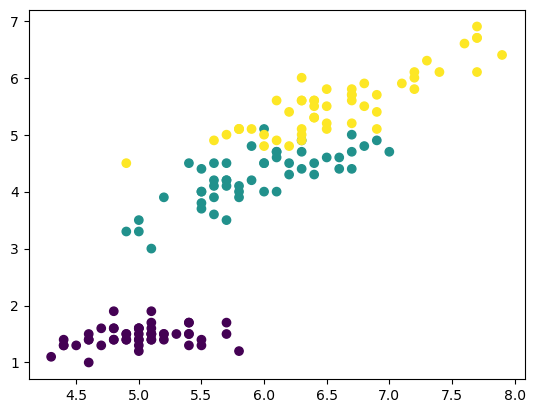

In [7]:
scatter_plot = plt.scatter(x=df['sepal length (cm)'],
                           y=df['petal length (cm)'],
                           c=df['species'],      # the color of each point in the plot is determined by the value in the 'species' column
                           label=df['species'])
plt.show()

Note: By default, Jupyter Notebooks will output the last plot executed. This is not guaranteed if you are working from another environment (i.e. running this code from a Python script). It is a good practice to include `plt.show()` everytime you plot a figure if you wish to see it.



#### **Title and axis labels**

To ensure our plot is meaningful and easily understood, we should add a plot title and labels. We can do this using `plt.figure()`, `plt.xlabel()`, and `plt.ylabel()`.

| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| plt.title() | label | a Matplotlib Text object that represents the title | plt.title(label) |
| plt.xlabel() | xlabel | a Matplotlib Text object that represents the x axis label | plt.xlabel(xlabel) |
| plt.ylabel() | ylabel | a Matplotlib Text object that represents the x axis label | plt.ylabel(ylabel) |

Below, we have filled in the title label for you. Now it's your turn: write the code to add axis labels.

<span style="background-color: #FFD700">**Complete the code cell below**</span> for `plt.xlabel()` and `plt.ylabel()` 

Text(0, 0.5, 'petal length (cm)')

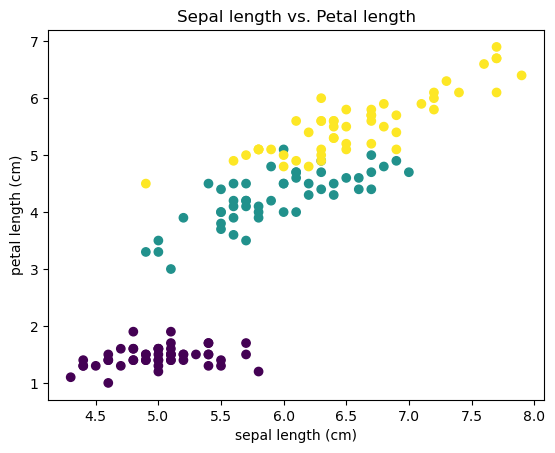

In [8]:
# TODO: Fill in this part with your scatter plot code from above
scatter_plot = plt.scatter(x=df['sepal length (cm)'],
                           y=df['petal length (cm)'],
                           c=df['species'],
                           label=df['species'])

# This part is new
plt.title("Sepal length vs. Petal length")
# TODO: add the x-axis label here
plt.xlabel('sepal length (cm)')
# TODO: add the y-axis label here
plt.ylabel('petal length (cm)')

#### **Creating a legend**


To create a legend, we need the ```legend()``` function and ```*yourplot.legend_elements()```.

| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| plt.legend() | *yourplot*.legend_elements() | a Matplotlib legend. | plt.legend(**yourplot*.legend_elements(), loc=*loc*, title=*title*) |

* Calling ```.legend_elemets()``` on your plot returns the legend handles and labels. You can think of Matplotlib handles as line objects drawing the paths, and each label is a string for the paths. When passing this into ```plt.legend()```, make sure you add ```*``` before it. This is the required syntax.
* `loc`: The location of the legend. Options include "upper left", "lower right", etc. You can find more options in the documentation.
* `title`: The title for the legend.

For more information on legends, see the documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

<span style="background-color: #FFD700">**Complete the code cell below**</span> to create a legend with the title "Species", placed on the lower right corner of the plot.

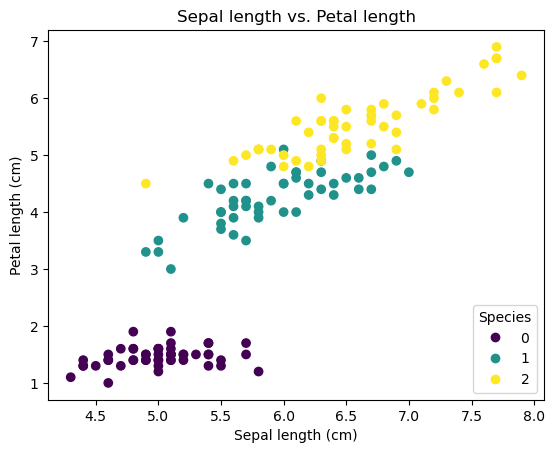

In [9]:
scatter_plot = plt.scatter(x=df['sepal length (cm)'],
                           y=df['petal length (cm)'],
                           c=df['species'],
                           label=df['species'])
plt.title("Sepal length vs. Petal length")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal length (cm)")

# TODO: write your code here
plt.legend(*scatter_plot.legend_elements(), loc="lower right", title="Species")

#### **Subplots**

One of our goals is to visually identify any associations between variables at a glance. Instead of writing the code for each pair individually, we can write the code in a for loop and organize them using **subplots**.

Subplots in Matplotlib allow us to group plots together and organize them into a grid-like format with multiple rows/columns of plots. This is useful for us since we need to create many pair plots. For our dataset of 4 features, we need to create 6 plots in total (we do not need to plot a feature against itself). Using a for loop saves us from rewriting similar code for each pair, and using subplots makes it easier to visualize all the plots in one single layout.

| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| plt.subplots() | nrows, ncols, sharex, sharey, figsize | fig, axes | fig, axes = plt.subplots(nrows=*nrows*, ncols=*ncols*, ... ) |

* **`nrows, ncols`**: Integers specifying the number of rows and/or columns of plots you want. If you do not specify it, the default will be 1.
* **`sharex, sharey`**: Boolean values (True/False) specifying whether subplots will have the same axis range or not. For example, if you specify ```sharex=True```, all subplots in the group will share the same x-axis range. Otherwise, each subplot will have its own axis ranges depending on the data by default.
* **`figsize`**: The dimensions of the plots in inches. It is sometimes useful to manually adjust figsize to ensure the plots are readable. Eg. ```figsize=(10,10)``` for a 10x10 plot.

```plt.subplots()``` returns 2 outputs. The first is a **Matplotlib Figure**. This implements the group of plots at a high level.

The second is a list of **Matplotlib Axes**, one for each subplot created (number of `Axes` objects = `nrows` x `ncols`). They implement the details of each subplot, such as the plot graphics, title label, legend, and other elements we previously worked with.

Figures and Axes each come with their own functions. We will not teach them in detail in this module, but we list some of them used in the code below:

Figure functions:
* ```fig.tight_layout()``` - formats the group of subplots to prevent overlap

Axes functions:
* All plotting functions similarly defined for ```plt``` - i.e. ```ax.scatter()```, ```ax.bar()```, etc.
* ```ax.set_title()``` - similar to plt.title()
* ```ax.set_xlabel()``` - similar to plt.xlabel()
* ```ax.set_ylabel()``` - similar to plt.ylabel()
* ```ax.legend()``` - similar to plt.legend()

**Your task**: First, read the code cell below; the in-line comments will guide you. Then, fill in the lines marked with TODO. Namely, you will need to do 2 things:
1. Create a group of 6 subplots
      * use a single column and 6 rows.
      * make all subplots share x and y axis ranges.
      * specify 10x10 for the subplot dimensions.
2. Generate a scatter subplot for each pair of features. You shouldn't need to modify the for loop besides the part marked with TODO. Use ```xfeat``` and ```yfeat``` which we have defined for you to get the appropriate columns of the DataFrame.

<span style="background-color: #FFD700">**Complete the code cell below.**</span>

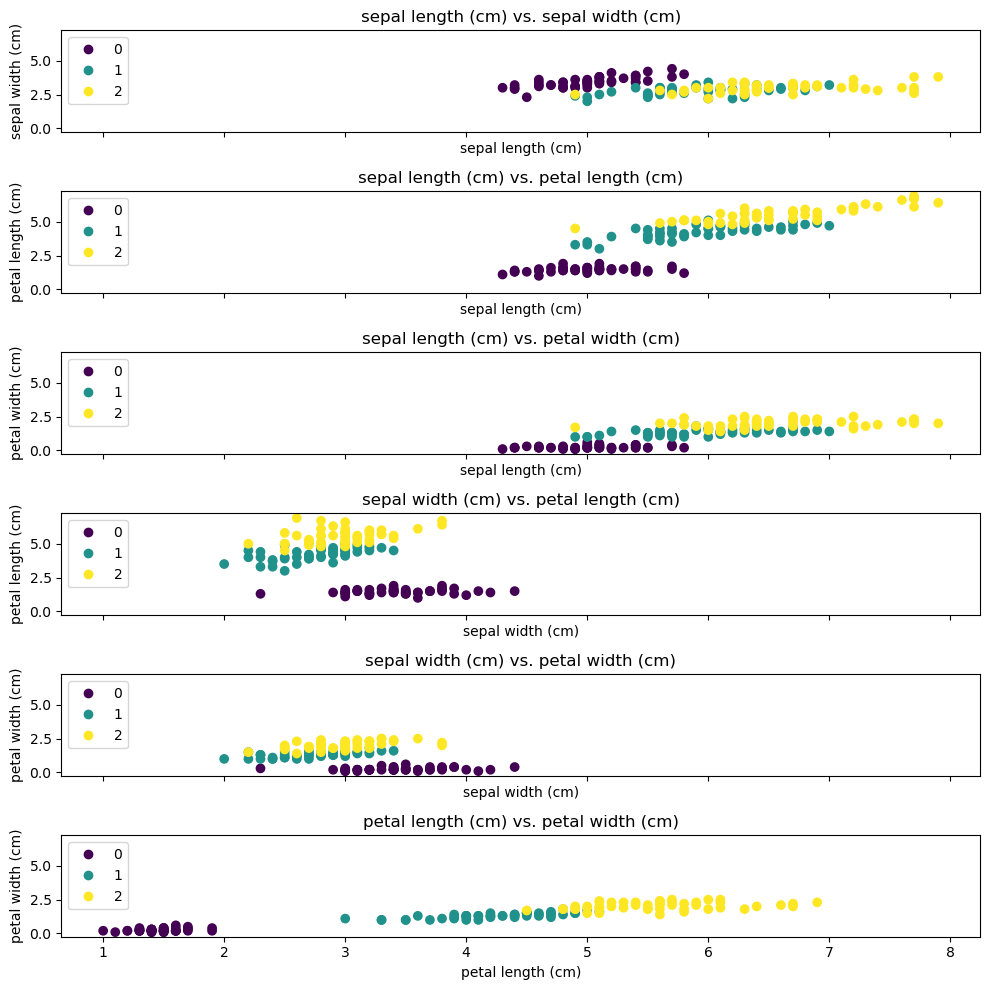

In [20]:
# These variables do not depend on the feature pairs
# so we can define them outside of the loop.

# Define color mapping from species value
colors = {0: 'red', 1: 'blue', 2: 'gold'}

# Extract the names of the 4 features
features = df.columns[:-1]

# Create a group of 6 subplots
# TODO: fill in the code below
fig, axes = plt.subplots(nrows=6, sharex=True, sharey=True, figsize=(10,10))
num_subplot = 0

# Loop through the pairs
# This skips pairs we've already seen (i.e., 1 vs 2 is the same as 2 vs 1)
# and also skips the self-pairs
for i in range(len(features)):
  for j in range(i + 1, len(features)):
    xfeat = df.columns[i]   # get name of feature to plot along x axis
    yfeat = df.columns[j]   # get name of feature to plot along y axis
    ax = axes[num_subplot]  # index into a new subplot in the Axes list
    num_subplot += 1        # increment the index for the next subplot

    # Plot the data
    # TODO: fill in the code below
    scatter_plot = ax.scatter(x=df[xfeat], y=df[yfeat],
                              c=df['species'],
                              label=df['species'])
    ax.set_title(f'{xfeat} vs. {yfeat}')
    ax.set_xlabel(f'{xfeat}')
    ax.set_ylabel(f'{yfeat}')

    # Add a legend (this is the same for all subplots)
    ax.legend(*scatter_plot.legend_elements(), loc='upper left')

# Finally, adjust the layout in the group of subplots to prevent overlap
fig.tight_layout()

**Q1: Do you see any distinct separations of the 3 species? Which species form groups ("clusters") according to the pairplots?**

<span style="background-color: #FFD700">**Write your answer below**</span>

---

Answer:

**Q2: Which two features are the most helpful in distinguishing between species? What is your rationale for choosing these two features?**


<span style="background-color: #FFD700">**Write your answer below**</span>

---

Answer:

### Part 2: Mammal Teeth dataset

As you have seen in the Iris pairplots, plotting certain features can reveal distinct groups of points. These groups of points are called **clusters** (see definition below). Points within a cluster are thought to be more closely related than points from different clusters.

<span style="background-color: #AFEEEE">**cluster**</span>: A group of similar data points.

We can perform other types of clustering using special plots. **Hierarchical clustering** is a type of clustering that groups two subgroups together based on a closeness metric and algorithm (eg. Euclidean distance), iteratively doing so until there is one group at the highest level.

A **dendrogram** is a type of plot that shows how subgroups have been combined at each level in hierarchical clustering.

*source: https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/*

In this section, we will explore a dataset of mammalian teeth to gain insight into the evolutionary relationships between species.

Building a dendrogram based on a dataset of mammalian tooth size allows us to visually explore the evolutionary relationships among different mammalian species. By clustering species with similar tooth sizes together, we can infer their phylogenetic relatedness and understand their evolutionary history. This approach provides insights into common ancestry, adaptive radiation, and ecological niche differentiation among mammals based on dental morphology. Hierarchical clustering is often used with genetic datasets as well.


You can find "mammal_teeth.csv" used in the following section here: [mammal_teeth](https://drive.google.com/file/d/1tBjZF-KiUZ8BzvNw_7uHNGuowOHdTXLE/view?usp=drive_link)

In [21]:
df_teeth = pd.read_csv("mammal_teeth.csv")
df_teeth.head()

,MAMMAL,Top incisors,Bottom incisors,Top canines,Bottom canines,Top premolars,Bottom premolars,Top Molars,Bottom molars
1,BROWN BAT,2,3,1,1,3,3,3,3
2,MOLE,3,2,1,0,3,3,3,3
3,SILVER HAIR BAT,2,3,1,1,2,3,3,3
4,PIGMY BAT,2,3,1,1,2,2,3,3
5,HOUSE BAT,2,3,1,1,1,2,3,3


Let's take a look at which mammals are included in the dataset.

In [22]:
print(df_teeth['MAMMAL'])

1           BROWN BAT
2                MOLE
3     SILVER HAIR BAT
4           PIGMY BAT
5           HOUSE BAT
6             RED BAT
7                PIKA
8              RABBIT
9              BEAVER
10          GROUNDHOG
11      GRAY SQUIRREL
12        HOUSE MOUSE
13          PORCUPINE
14               WOLF
15               BEAR
16            RACCOON
17             MARTEN
18             WEASEL
19          WOLVERINE
20             BADGER
21        RIVER OTTER
22          SEA OTTER
23             JAGUAR
24             COUGAR
25           FUR SEAL
26           SEA LION
27          GREY SEAL
28      ELEPHANT SEAL
29           REINDEER
30                ELK
31               DEER
32              MOOSE
Name: MAMMAL, dtype: object


If we expect mammals with close evolutionary relationships to have similar teeth features, we would expect all the bats (silver hair, pigmy, house, red, etc.) to be clustered together because they are all bat species (of the Chiroptera genus). One might expect sea mammals (otters, sea lions, seals) to be found in one cluster, separate from land mammals. We could make several other hypotheses based on our knowledge of similar/dissimilar aniamls (jaguar/cougar, elk/deer/moose).

Try viewing the scatterplot for the Top incisors feature. Plot the Top incisors on the x-axis and the species names on the y-axis.

<span style="background-color: #FFD700">**Complete the code cell below**</span>

([<matplotlib.axis.XTick at 0x7f623a41d6d0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

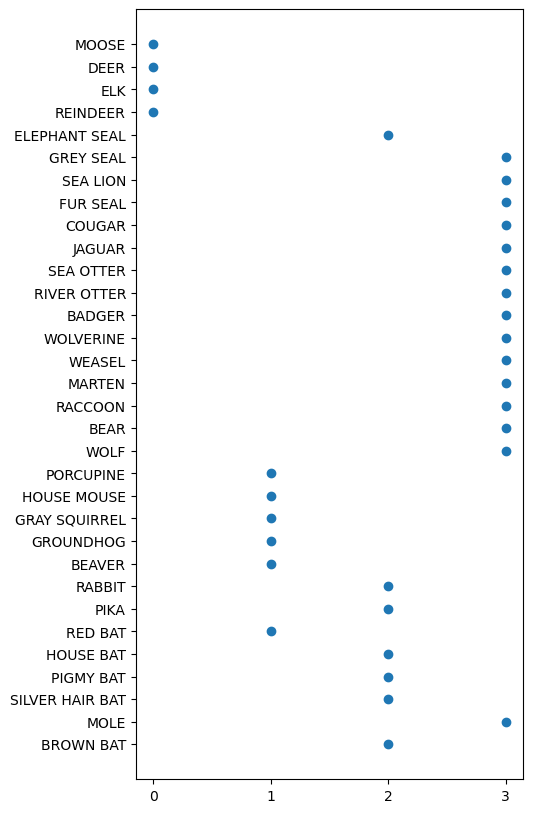

In [23]:
# set figure size
plt.figure(figsize=(5,10))

# TODO: complete the code below
plt.scatter(x=df_teeth['Top incisors'],
            y=df_teeth['MAMMAL'])

# set the ticks for the x-axis scale
plt.xticks(ticks=range(int(df_teeth['Top incisors'].min()), int(df_teeth['Top incisors'].max()) + 1))

**Answer the question below:**

##### **Q3: Based on the number of top incisors alone, what are your observations? Do they align with your first insticts? Refer to at least one "group" of animals you identify in the graph.**

<span style="background-color: #FFD700">**Write your answer below**</span>

---


#### **Hierarchical Clustering**

<!-- <div>
<img src="https://drive.google.com/uc?export=view&id=1si-HoNm11E7Tn6d7cna8GO-tKWsS4Rp0" width="600"/>
</div> -->

![hierarch.gif](hierarch.gif)

Hierarchical clustering is a data analysis technique that groups data points into clusters based on similar characteristics. We can use this to identify patterns in the data and the similarities and/or dissimilarities across data points. Hierarchical clustering builds a tree-like structure of clusters, making it easier to interpret clusters and sort data. There are two general approaches for hierarchical clustering: agglomerative clustering (bottom-up) and divisive clustering (top-down).

<!-- <div>
<img src="https://drive.google.com/uc?export=view&id=17901qWH0uoQ8S157AEoRxtkvcIkvgUF9" width="600"/>
</div> -->
![clustering.png](clustering.png)

We will use [agglomerative clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) as follows:
1. Start by treating each data point as an individual cluster.
2. Merge pairs of data points based on similarity.
3. Continue merging the most similar pairs until you have one large cluster.

In this example, we will be using [Ward's method](https://en.wikipedia.org/wiki/Ward%27s_method) of agglomerative clustering. Ward's method is a specialized agglomerative hierarchical clustering technique introduced by Joe H. Ward, Jr. Unlike other linkage methods, Ward's method doesn't directly define distances between clusters. Instead, it aims to generate clusters with minimum within-cluster variance.



#### **Dendrograms**

**Dendrograms** are an excellent way to visualize hierarchical clustering results.

To create a dendrogram, we need to do the following:
1. Get all features from the dataset (minus the species classification column)
2. Get the **linkage matrix** using scipy with an algorithm of our choice. We will use [Ward's method](https://en.wikipedia.org/wiki/Ward%27s_method).
3. Create the dendrogram plot using scipy and format the plot using some Matplotlib functions.

**linkage matrix**: A data structure that stores information about the merging of clusters at each step of the clustering process.

First, let's import ```dendrogram``` and ```linkage``` from ```scipy```.

In [24]:
# for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

> Step 1: Extract features

Step 1 is easy - we give the code to extract all feature columns below.

In [25]:
features = df_teeth.iloc[:,1:]  # extract feature columns

> Step 2: Creating the linkage matrix

To create a linkage matrix, we need to select the type of method. In general, methods used for hierarchical clustering use the distance between two points based on their features to determine clusters. The methods differ in how they assign the cluster membership.

As mentioned above, we will be using Ward's method in this example through the ```'ward'``` parameter in the ```linkage()``` function. You can read about other methods here in the scipy documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| linkage() | features, method | a linkage matrix | linkage(features, method) |

<span style="background-color: #FFD700">**Complete the code cell below.**</span>

In [26]:
# TODO: create a linkage matrix using Ward's method
# Ward: use sum of squared dist. to the cluster centres as the proximity metric for merging two clusters
linkage_matrix = linkage(features, 'ward')

> Step 3: Creating the dendrogram

Scipy's ```dendrogram()``` function generates a dendrogram that we can modify using Matplotlib.

| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| dendrogram() | linkage_matrix, orientation, labels | A dictionary of data structures computed to render the dendrogram (not needed). | dendrogram(linkage_matrix, orientation=*orientation*, labels=*labels*) |

* For this dataset, we flip the dendrogram using ```orientation='left'``` so the plot is more readable.
* We have labelled the species of each data point instead of the data point ids, so we can see which species were clustered together (to_numpy() simply converts the species label to a structure that the function expects - do not worry about this part).

Text(0.5, 0, 'Cluster distance')

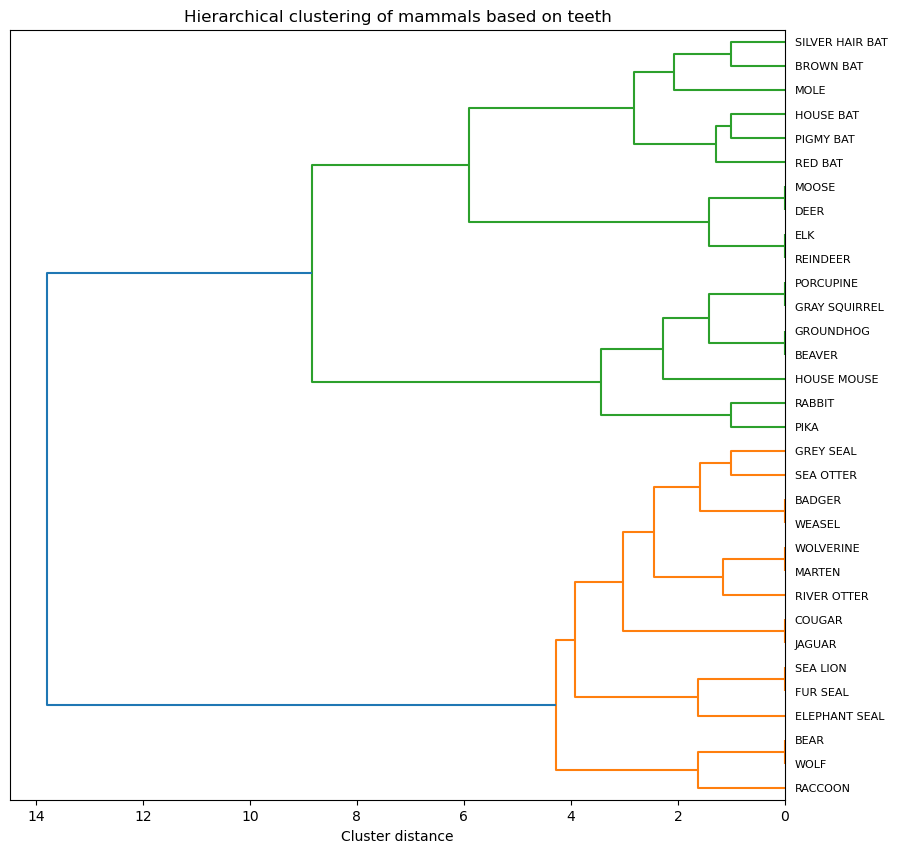

In [27]:
# plot dendrogram
fig = plt.figure(figsize=(10, 10))
dendrogram(linkage_matrix, orientation="left", labels=df_teeth['MAMMAL'].to_numpy())

# some formatting to make it look nice
plt.title("Hierarchical clustering of mammals based on teeth")
plt.xlabel("Cluster distance")

In this view, the y-axis shows all the datapoints as their species labels. The x-axis refers to the distance between clusters (as calculated using Ward's method, in our case).

**Q4: What do you notice about marine animals (are they grouped close together or far apart)? Is this in line with your intuition?**

<span style="background-color: #FFD700">**Write your answer below**</span>

---

**Q5: What about bats? Is this in line with your intuition?**

<span style="background-color: #FFD700">**Write your answer below**</span>

---

#### **Cluster thresholds**
We can vary the cluster distance threshold (somewhat arbitrarily for now) and see what clusters we get.

To show the clusters in different colours, we will specify the ```color_threshold``` parameter in the  function ```dendrogram()```.

We also add a vertical line at the cluster threshold in the dendrogram with ```plt.axvline()```.

| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| plt.axvline() | x, c, lw, linestyle | a Matplotlib line. | plt.axvline(x=*x*, c=*c*, ... )|

* x (int): The x-axis value where the vertical line should be drawn.
* c (string): The color for the line. eg. 'red', 'blue', etc.
* lw (int): The linewidth for the line.
* linestyle (string): The line style. eg. '-', dashed', etc.

*Note: Since we have a horizontal dendrogram, we will draw a vertical line. Normally, we have vertical dendrograms, so we draw horizontal lines.

Let's see what happens when we set the threshold to ```4```.

Text(0.5, 0, 'Cluster size')

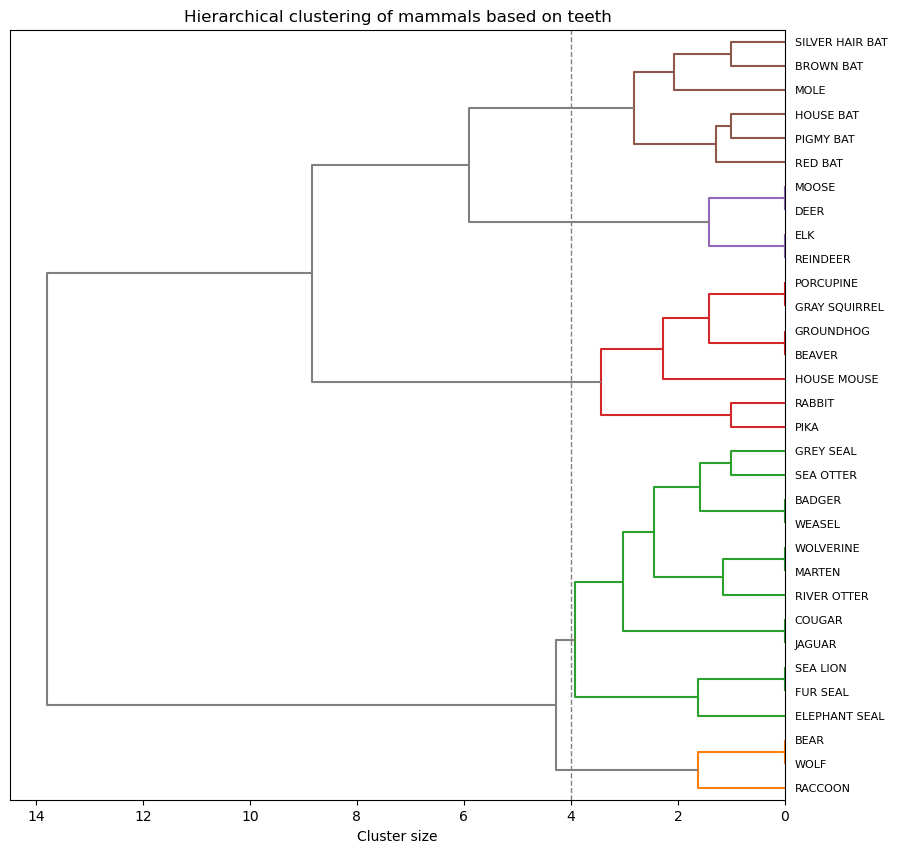

In [28]:
# NOTE: students do not need to recompute the linkage matrix
# since the algorithm and dataset haven't changed.
# We are only modifying the dendrogram and the plot.

plt.figure(figsize=(10,10))
# Make the dendrogram and give the colour above the threshold
dendrogram(linkage_matrix,
           color_threshold=4,
           above_threshold_color='grey',
           orientation="left",
           labels=df_teeth['MAMMAL'].to_numpy())

# Add vertical line (normally a horizontal line for dendrograms in vertical orientation)
# everything to the right of the vertical line is a cluster; separate with colors
plt.axvline(x=4, c='grey', lw=1, linestyle='dashed')    # arbitrary threshold 4
plt.title("Hierarchical clustering of mammals based on teeth")
plt.xlabel("Cluster size")

**Q6.** **What are the animal groups according to this threshold?**

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer:

- all bats, mole
- moose, deer, elk, reindeer
- procupine, gray squirrel, groundhog, beaver, mouse, rabbit, pikka
- seals, otters, badger, weasels, wolverine, marten, cougar, jaguar, sea lion
- bear, wolf, raccooncoon

## **Graded Exercise (5 marks)**

**GQ1. (1 mark) In the previous example, the fourth cluster (grey seal to elephant seal) was very close to the cluster size threshold. Create another dendrogram for the mammal dataset using the same parameters as before, except with cluster size 3.5**

<span style="background-color: #FFD700">**Write your code below**</span>


Text(0.5, 0, 'Cluster distance')

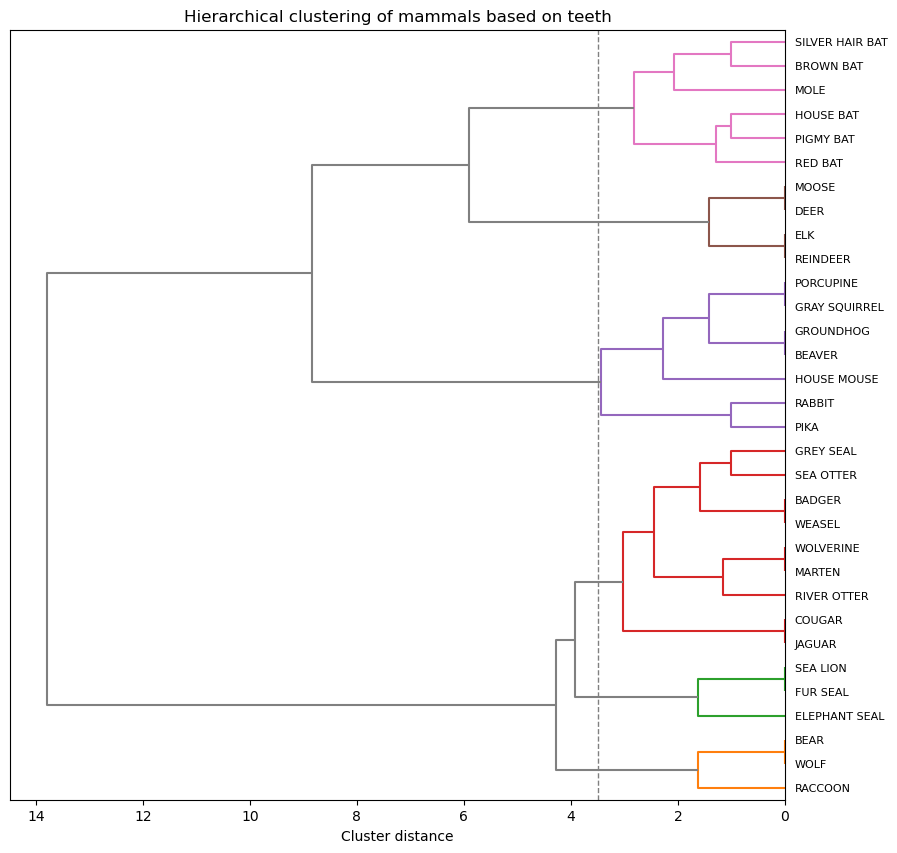

In [29]:
# NOTE: Students do not need to recompute the linkage matrix
# since the algorithm and dataset haven't changed.
# We are only modifying the dendrogram and the plot.
# features = df_teeth.iloc[:,1:]  # extract columns except mammal classification
# create linkage matrix using Ward
# Ward: use sum of squared dist. to the cluster centres as the proximity metric for merging two clusters
# linkage_matrix = linkage(features, 'ward')

plt.figure(figsize=(10,10))
# TODO: modify the dendrogram to set a color threshold
dendrogram(linkage_matrix,
           color_threshold=3.5,
           above_threshold_color = 'grey',
           orientation = "left",
           labels = df_teeth['MAMMAL'].to_numpy())

# TODO: Complete the code below to add a dashed vertical line at the color threshold
plt.axvline(x=3.5, c='grey', lw=1, linestyle='dashed')
plt.title("Hierarchical clustering of mammals based on teeth")
plt.xlabel("Cluster distance")

**GQ2. (1 mark) What are the animal groups according to this threshold?**

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer:

- all bats, mole
- moose, deer, elk, reindeer
- porcupine, gray squirrel, groundhog, beaver, mouse, rabbit, pikka
- grey seal, sea otter, badger, weasel, wolverine, marten, river otter, cougar, jaguar
- sea lion, fur seal, elephant seal
- bear, wolf, raccoon


**GQ3.(2 marks) This dendrogram suggests that river otters are more closely related to matens than sea otters. Is this true? Look up the phylogeny of these animals and the family/families they belong to to help you answer this question.**

* Note: If you were not able to create the dendrogram properly to see this relationship, you can still answer this question and receive full marks on GQ3.

<span style="background-color: #FFD700">**Write your answer below**</span>

Answer:

These 3 animals are part of the Mustelidae family, so it makes sense that they are all near each other. According to the phylogeny here, river otters (Lontras) are actually closer to sea otters (E.lutris) than martens (Martes). https://en.wikipedia.org/wiki/File:Mustelidae_timetree_(edited).jpg (It is not clear what their dendrogram is based on - could be genetic data, or other features)

**GQ4. (1 mark) Although the groupings resulting from this threshold are decently logical (animals are generally clustered with other animals similar in physical features), not every grouping seems perfect. Using another distance calculation method (other than Ward's method) could help us achieve better groupings. List one example of another method, briefly describe how it works, and in which scenarios this method might achieve better clustering.**

* You can read about different distance methods in scipy's documentation for obtaining the linkage matrix: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html. The explanations here are minimal, so you are encouraged to do further research through googling (looking at diagrams can help you see the differences between each method). You should respond in your own words.


<span style="background-color: #FFD700">**Write your answer below**</span>

---

## Conclusion

In this module, you learned how to use plotting libraries to visualize relationships of different features within datasets, and adjust the plotting by changing parameters to the plotting functions. Then, you learned what hierarchical clustering is, and how to perform and visualize hierarchical clustering on the mammal teeth dataset.